In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_profiling
import seaborn as sns
import itertools
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import os

In [4]:
os.chdir("C:\\Users\\NEETU KUMARI\\Desktop\\AL class\\case study\\ml case study\\data")

In [5]:
dataTrain = pd.read_csv('train.csv')
dataTest = pd.read_csv('test.csv')
dataFeature = pd.read_csv('features.csv')
dataStores = pd.read_csv('stores.csv')

In [6]:
dataFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [7]:
dataFeature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
from statistics import mean
dataFeature['CPI'] = dataFeature['CPI'].fillna(0)
dataFeature['Unemployment'] = dataFeature['Unemployment'].fillna(0)
dataFeature['MarkDown1'] = dataFeature['MarkDown1'].fillna(0)
dataFeature['MarkDown2'] = dataFeature['MarkDown2'].fillna(0)
dataFeature['MarkDown3'] = dataFeature['MarkDown3'].fillna(0)
dataFeature['MarkDown4'] = dataFeature['MarkDown4'].fillna(0)
dataFeature['MarkDown5'] = dataFeature['MarkDown5'].fillna(0)

In [9]:
dataFeature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [10]:
dataTrain1 = pd.merge(dataTrain, dataStores)
dataTest1 = pd.merge(dataTest, dataStores)   
train = pd.merge(dataTrain1, dataFeature)
test = pd.merge(dataTest1, dataFeature)

In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [12]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [13]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [14]:
test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

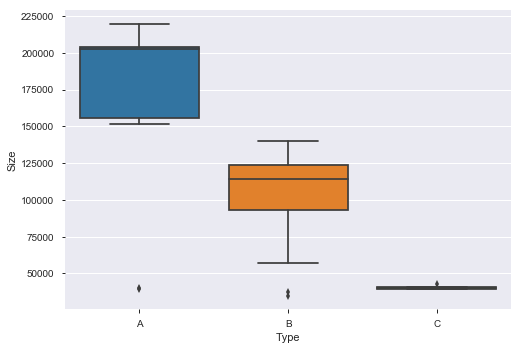

In [15]:
store_type = pd.concat([dataStores['Type'], dataStores['Size']], axis=1)
fig = sns.boxplot(x='Type', y='Size', data=store_type)
# Type a is the largest store

In [16]:
sizes=dataStores.groupby(['Type']).count().round(1)
print(sizes)

      Store  Size
Type             
A        22    22
B        17    17
C         6     6


In [17]:
f = lambda x: 1 if x==True else 0
train['IsHoliday']=train['IsHoliday'].apply(f)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [18]:
f = lambda x: 1 if x==True else 0
test['IsHoliday']=test['IsHoliday'].apply(f)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


[]

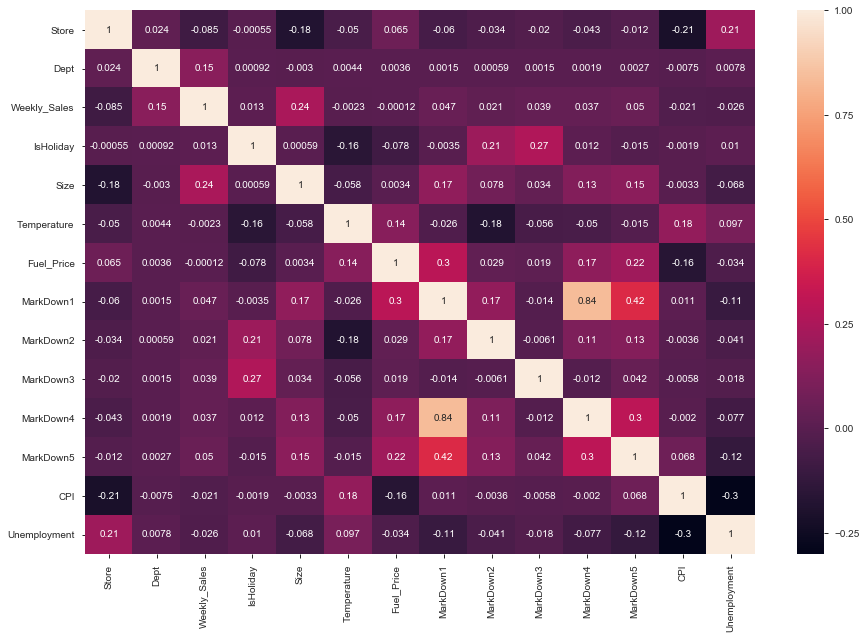

In [19]:
corr = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 54.7+ MB


In [21]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Quater'] = pd.DatetimeIndex(train['Date']).quarter
train['Week']  = pd.DatetimeIndex(train['Date']).week
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quater,Week
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,1,5
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,1,5
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,1,5
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,1,5
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,1,5


In [22]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
test['Quater'] = pd.DatetimeIndex(test['Date']).quarter
test['Week']  = pd.DatetimeIndex(test['Date']).week
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quater,Week
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44


In [23]:
# vriables for holidays
# Superbowl dates
sb_1=np.datetime64('2010-02-12')
sb_2=np.datetime64('2011-02-11')
sb_3=np.datetime64('2012-02-10')
sb_4=np.datetime64('2013-02-08')

# labour day
ld_1=np.datetime64('2010-09-10')
ld_2=np.datetime64('2011-09-09')
ld_3=np.datetime64('2012-09-07')
ld_4=np.datetime64('2013-09-06')

# thanks giving
tg_1=np.datetime64('2010-11-26')
tg_2=np.datetime64('2011-11-25')
tg_3=np.datetime64('2012-11-23')
tg_4=np.datetime64('2013-11-29')

# christmas day
ch_1=np.datetime64('2010-12-31')
ch_2=np.datetime64('2011-12-30')
ch_3=np.datetime64('2012-12-28')
ch_4=np.datetime64('2013-12-27')


In [24]:
train['superbowl']=np.where(((train.Date==sb_1)|(train.Date==sb_2)|(train.Date==sb_3)|(train.Date==sb_4)),1,0)
train['labor']=np.where(((train.Date==ld_1)|(train.Date==ld_2)|(train.Date==ld_3)|(train.Date==ld_4)),1,0)
train['thanks']=np.where(((train.Date==tg_1)|(train.Date==tg_2)|(train.Date==tg_3)|(train.Date==tg_4)),1,0)
train['xmas']=np.where(((train.Date==ch_1)|(train.Date==ch_2)|(train.Date==ch_3)|(train.Date==ch_4)),1,0)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,xmas
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,2010,2,1,5,0,0,0,0
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,2010,2,1,5,0,0,0,0
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,2010,2,1,5,0,0,0,0
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,2010,2,1,5,0,0,0,0
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,...,211.096358,8.106,2010,2,1,5,0,0,0,0


In [25]:
test['superbowl']=np.where(((test.Date==sb_1)|(test.Date==sb_2)|(test.Date==sb_3)|(test.Date==sb_4)),1,0)
test['labor']=np.where(((test.Date==ld_1)|(test.Date==ld_2)|(test.Date==ld_3)|(test.Date==ld_4)),1,0)
test['thanks']=np.where(((test.Date==tg_1)|(test.Date==tg_2)|(test.Date==tg_3)|(test.Date==tg_4)),1,0)
test['xmas']=np.where(((test.Date==ch_1)|(test.Date==ch_2)|(test.Date==ch_3)|(test.Date==ch_4)),1,0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Year,Month,Quater,Week,superbowl,labor,thanks,xmas
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0


In [26]:
# converting date to week of the year since we have to find out weekly sales
train['YearWeek'] = train.Year.astype(str).str.cat(train.Week.astype(str))
train.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train['YearWeek'] = train.YearWeek.astype(int)


In [27]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Month,Quater,superbowl,labor,thanks,xmas,YearWeek
0,1,1,24924.50,0,A,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2,1,0,0,0,0,20105
1,1,2,50605.27,0,A,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2,1,0,0,0,0,20105
2,1,3,13740.12,0,A,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2,1,0,0,0,0,20105
3,1,4,39954.04,0,A,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2,1,0,0,0,0,20105
4,1,5,32229.38,0,A,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2,1,0,0,0,0,20105


In [28]:
# converting date to week of year for test data
test['YearWeek'] = test.Year.astype(str).str.cat(test.Week.astype(str))
test.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
test['YearWeek'] = test.YearWeek.astype(int)
test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Month,Quater,superbowl,labor,thanks,xmas,YearWeek
0,1,1,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,...,2737.42,223.462779,6.573,11,4,0,0,0,0,201244
1,1,2,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,...,2737.42,223.462779,6.573,11,4,0,0,0,0,201244
2,1,3,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,...,2737.42,223.462779,6.573,11,4,0,0,0,0,201244
3,1,4,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,...,2737.42,223.462779,6.573,11,4,0,0,0,0,201244
4,1,5,0,A,151315,55.32,3.386,6766.44,5147.7,50.82,...,2737.42,223.462779,6.573,11,4,0,0,0,0,201244


In [29]:
train=pd.get_dummies(train)
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Month,Quater,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C
0,1,1,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,...,2,1,0,0,0,0,20105,1,0,0
1,1,2,50605.27,0,151315,42.31,2.572,0.0,0.0,0.0,...,2,1,0,0,0,0,20105,1,0,0
2,1,3,13740.12,0,151315,42.31,2.572,0.0,0.0,0.0,...,2,1,0,0,0,0,20105,1,0,0
3,1,4,39954.04,0,151315,42.31,2.572,0.0,0.0,0.0,...,2,1,0,0,0,0,20105,1,0,0
4,1,5,32229.38,0,151315,42.31,2.572,0.0,0.0,0.0,...,2,1,0,0,0,0,20105,1,0,0


In [30]:
test=pd.get_dummies(test)
test.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month,Quater,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C
0,1,1,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,4,0,0,0,0,201244,1,0,0
1,1,2,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,4,0,0,0,0,201244,1,0,0
2,1,3,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,4,0,0,0,0,201244,1,0,0
3,1,4,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,4,0,0,0,0,201244,1,0,0
4,1,5,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,11,4,0,0,0,0,201244,1,0,0


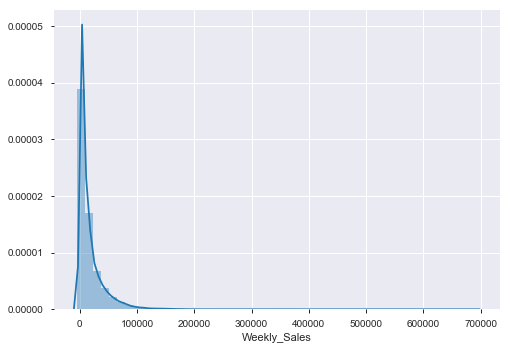

In [31]:
sns.distplot(train.Weekly_Sales)

In [32]:
# The data is skewed so we apply log transformation
np.seterr(divide = 'ignore')
train['tran_Weekly_Sales']=np.where(train['Weekly_Sales']>0, np.log(train['Weekly_Sales']), 0)
train.drop(columns=['Weekly_Sales'],inplace=True)
train.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Quater,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C,tran_Weekly_Sales
0,1,1,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,1,0,0,0,0,20105,1,0,0,10.123607
1,1,2,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,1,0,0,0,0,20105,1,0,0,10.831811
2,1,3,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,1,0,0,0,0,20105,1,0,0,9.528075
3,1,4,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,1,0,0,0,0,20105,1,0,0,10.595485
4,1,5,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,1,0,0,0,0,20105,1,0,0,10.380634


In [33]:
train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'Quater', 'superbowl', 'labor', 'thanks',
       'xmas', 'YearWeek', 'Type_A', 'Type_B', 'Type_C', 'tran_Weekly_Sales'],
      dtype='object')

In [34]:
y=train['tran_Weekly_Sales'].values
columns = ['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown3', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'Quater', 'superbowl', 'labor', 'thanks',
       'xmas', 'YearWeek', 'Type_A', 'Type_B', 'Type_C']
features=train[list(columns)].values
features

array([[ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  2.,  0., ...,  1.,  0.,  0.],
       [ 1.,  3.,  0., ...,  1.,  0.,  0.],
       ...,
       [45., 95.,  0., ...,  0.,  1.,  0.],
       [45., 97.,  0., ...,  0.,  1.,  0.],
       [45., 98.,  0., ...,  0.,  1.,  0.]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.20, random_state=56)

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
y_pred = regressor.predict(features)

In [38]:
train1=train.copy()
test1=test.copy()

In [39]:
train1['pred_weekysale']=y_pred
train1.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C,tran_Weekly_Sales,pred_weekysale
0,1,1,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,20105,1,0,0,10.123607,10.123607
1,1,2,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,20105,1,0,0,10.831811,10.831811
2,1,3,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,20105,1,0,0,9.528075,9.528075
3,1,4,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,20105,1,0,0,10.595485,10.595485
4,1,5,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,20105,1,0,0,10.380634,10.380634


In [40]:
test_features=test[list(columns)].values
test_features

array([[ 1.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  2.,  0., ...,  1.,  0.,  0.],
       [ 1.,  3.,  0., ...,  1.,  0.,  0.],
       ...,
       [45., 95.,  0., ...,  0.,  1.,  0.],
       [45., 97.,  0., ...,  0.,  1.,  0.],
       [45., 98.,  0., ...,  0.,  1.,  0.]])

In [41]:
test_pred=regressor.predict(test_features)

In [42]:
test1['pred_weeklesales']=test_pred
test1.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Quater,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C,pred_weeklesales
0,1,1,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,4,0,0,0,0,201244,1,0,0,10.441117
1,1,2,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,4,0,0,0,0,201244,1,0,0,10.653835
2,1,3,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,4,0,0,0,0,201244,1,0,0,9.053554
3,1,4,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,4,0,0,0,0,201244,1,0,0,10.536263
4,1,5,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,4,0,0,0,0,201244,1,0,0,10.216083


In [50]:
train1['true_weekly_sales']=np.exp(train1.tran_Weekly_Sales)
train1['predicted_weekly_sale']=np.exp(train1.pred_weekysale)
test1['predicted_weekly_sale']=np.exp(test1.pred_weeklesales)

In [52]:
MAPE = np.mean(np.abs(train1.true_weekly_sales - train1.predicted_weekly_sale)/train1.true_weekly_sales )
print(MAPE)
RMSE = metrics.mean_squared_error(train1.true_weekly_sales , train1.predicted_weekly_sale)
print(RMSE)

0.2512230159257746
4905683.3446753435


In [53]:
regressor.score(X_test, y_test)

0.9401407097132282

In [54]:
test1.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,superbowl,labor,thanks,xmas,YearWeek,Type_A,Type_B,Type_C,pred_weeklesales,predicted_weekly_sale
0,1,1,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,201244,1,0,0,10.441117,34238.88
1,1,2,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,201244,1,0,0,10.653835,42354.72
2,1,3,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,201244,1,0,0,9.053554,8548.87
3,1,4,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,201244,1,0,0,10.536263,37656.58
4,1,5,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,201244,1,0,0,10.216083,27339.37


In [56]:
test1.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'Quater', 'superbowl', 'labor', 'thanks',
       'xmas', 'YearWeek', 'Type_A', 'Type_B', 'Type_C', 'pred_weeklesales',
       'predicted_weekly_sale'],
      dtype='object')

In [59]:
final_report=test1.filter(['YearWeek','predicted_weekly_sale'],axis=1)
final_report.head()

,YearWeek,predicted_weekly_sale
0,201244,34238.88
1,201244,42354.72
2,201244,8548.87
3,201244,37656.58
4,201244,27339.37


In [61]:
final_report.to_csv('final_report.csv')